Adapted from https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

In [1]:
import tensorflow as tf

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.1.0


## Import Data set from Modified National Institute of Standards and Technology database (MNIST)

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


### Let's look at one random image

3


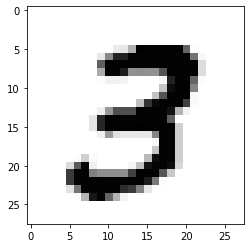

In [78]:
import matplotlib.pyplot as plt
image_index=7
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

## Reshaping the images

In [23]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train_reshaped = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_reshaped = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 28, 28, 1)
x_test_reshaped shape:  (10000, 28, 28, 1)


## Normalizing the images

In [118]:
# Making sure that the values are float so that we can get decimal points after division
x_train_norm= x_train_reshaped.astype('float32')
x_test_norm = x_test_reshaped.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train_norm /= 255
x_test_norm /= 255
print('x_train_normal shape:', x_train_normal.shape)
print('Number of images in x_train_normal', x_train_normal.shape[0])
print('Number of images in x_test_normal', x_test_normal.shape[0])

x_train_normal shape: (60000, 28, 28, 1)
Number of images in x_train_normal 60000
Number of images in x_test_normal 10000


## Building the convolutional neural network

In [119]:
# There are several high level TensorFlow APIs and I'll use the most straightforward API which is Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax)) # final Dense layer must have 10 neurons since we have 10 number classes

## Compiling the model

In [120]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', # by using this loss function instead of 'categorical_crossentropy'
              metrics=['accuracy'])                   # We can avoid encoding the y data
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               605824    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

## Train and Evaluate the model


In [121]:
# Train
model.fit(x=x_train_norm, y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 90s 2ms/sample - loss: 0.2210 - accuracy: 0.9331
Epoch 2/10
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.0881 - accuracy: 0.9734
Epoch 3/10
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.0593 - accuracy: 0.9816
Epoch 4/10
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0458 - accuracy: 0.9856 - loss: 0.0458 - accuracy: 0.98
Epoch 5/10
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.0374 - accuracy: 0.9878
Epoch 6/10
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0305 - accuracy: 0.9898
Epoch 7/10
60000/60000 [==============================] - 103s 2ms/sample - loss: 0.0245 - accuracy: 0.9917
Epoch 8/10
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0221 - accuracy: 0.9924
Epoch 9/10
60000/60000 [==============================] - 105s 2ms/sample - loss: 0

In [122]:
# Evaluate
loss, accuracy = model.evaluate(x_test_norm, y_test)
print ('test set accuracy is :', 100*accuracy)

10000/10000 [==============================] - 4s 367us/sample - loss: 0.0570 - accuracy: 0.9850
test set accuracy is : 98.50000143051147


## Predictions

In [123]:
preds = model.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


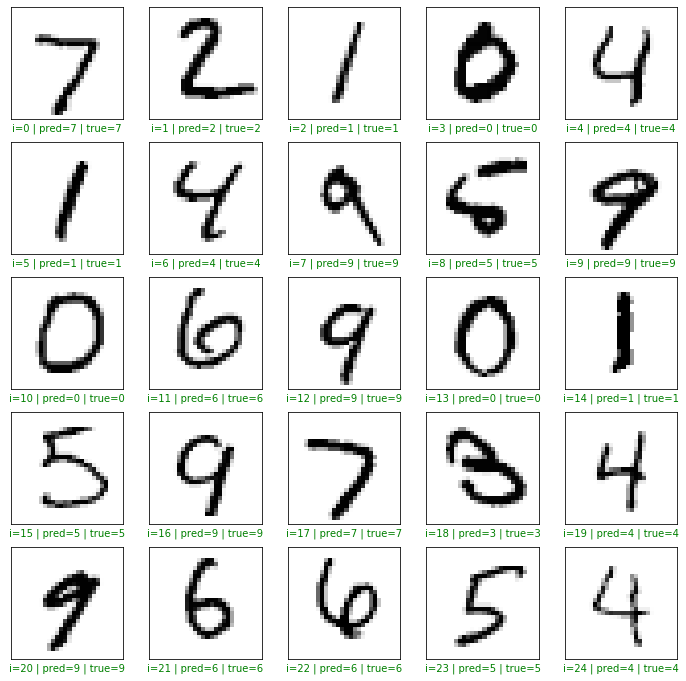

In [127]:
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(0, 25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = y_test[start_index + i]
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i].reshape(28, 28),cmap='Greys')
plt.show()